In [ ]:
import requests
import pandas as pd
import numpy as np
import scipy

# Extraction of data

specifying variables

In [ ]:
target_body = 1 # mercury barycenter
center_body = "@10" #sun
dt = 3600

timestep = "1hour"#f"{1} min"
start = "2020-JAN-01"
stop = "2021-DEC-31"
duration = '2yrs'

In [ ]:
url = "https://ssd.jpl.nasa.gov/api/horizons.api?"\
f"COMMAND={target_body}"\
f"&CENTER={center_body}"\
"&format=text"\
"&EPHEM_TYPE=VECTORS"\
"&MAKE_EPHEM=YES"\
"&OUT_UNITS=KM-S"\
"&CSV_FORMAT=YES"\
"&ELEM_LABELS=YES"\
"&OBJ_DATA=YES"\
"&REF_SYSTEM=ICRF"\
"&REF_PLANE=FRAME"\
"&VEC_TABLE=2"\
f"&STEP_SIZE={timestep}"\
f"&START_TIME={start}"\
f"&STOP_TIME={stop}"

In [ ]:
print(url)

https://ssd.jpl.nasa.gov/api/horizons.api?COMMAND=1&CENTER=@10&format=text&EPHEM_TYPE=VECTORS&MAKE_EPHEM=YES&OUT_UNITS=KM-S&CSV_FORMAT=YES&ELEM_LABELS=YES&OBJ_DATA=YES&REF_SYSTEM=ICRF&REF_PLANE=FRAME&VEC_TABLE=2&STEP_SIZE=1hour&START_TIME=2020-JAN-01&STOP_TIME=2021-DEC-31


extracting data into dataset

In [ ]:
read_data = requests.get(url)
src = read_data.text.split('\n')

data_start_idx = 0
data_end_idx = 0
mass_checkonce = True
for idx, line in enumerate(src):
  if "$$SOE" in line: # start of data
    data_start_idx = idx+1
    #print(idx+1)
  if "$$EOE" in line: # end of data
    data_end_idx = idx
    #print(idx)
  #if (mass_checkonce == True and"mass" in line: # extract mass

# dataframe method
columns = src[data_start_idx-3].split(',')
heading = [heading.strip() for heading in columns]

In [ ]:
df = pd.DataFrame(data.split(",") for data in src[data_start_idx:data_end_idx])
df.columns = heading

In [ ]:
df

,JDTDB,Calendar Date (TDB),X,Y,Z,VX,VY,VZ,
0,2458849.500000000,A.D. 2020-Jan-01 00:00:00.0000,-9.474762662376745E+06,-6.135742734912584E+07,-3.179453745699735E+07,3.848711305256677E+01,-2.272897798003292E+00,-5.203665203957473E+00,
1,2458849.541666667,A.D. 2020-Jan-01 01:00:00.0000,-9.336185162185332E+06,-6.136545428706884E+07,-3.181319006461712E+07,3.850035483314266E+01,-2.186508354764793E+00,-5.158889206629177E+00,
2,2458849.583333333,A.D. 2020-Jan-01 02:00:00.0000,-9.197560339613566E+06,-6.137317018190630E+07,-3.183168142060979E+07,3.851340325081514E+01,-2.100096099982322E+00,-5.114080979893346E+00,
3,2458849.625000000,A.D. 2020-Jan-01 03:00:00.0000,-9.058888890909437E+06,-6.138057495181128E+07,-3.185001140909219E+07,3.852625822681249E+01,-2.013661197339754E+00,-5.069240603023649E+00,
4,2458849.666666667,A.D. 2020-Jan-01 04:00:00.0000,-8.920171512606060E+06,-6.138766851554622E+07,-3.186817991446647E+07,3.853891968149566E+01,-1.927203810591381E+00,-5.024368155241462E+00,
...,...,...,...,...,...,...,...,...,...
17516,2459579.333333333,A.D. 2021-Dec-30 20:00:00.0000,5.388346213756245E+07,-7.913136766786176E+06,-9.812159776960272E+06,4.431910379859743E-01,4.416035920815260E+01,2.354440677568336E+01,
17517,2459579.375000000,A.D. 2021-Dec-30 21:00:00.0000,5.388478400176283E+07,-7.754119560022915E+06,-9.727350229879512E+06,2.911275765878301E-01,4.418246588041796E+01,2.357197740248219E+01,
17518,2459579.416666667,A.D. 2021-Dec-30 22:00:00.0000,5.388555789379574E+07,-7.595023499988207E+06,-9.642441762551529E+06,1.387621838346446E-01,4.420416626834684E+01,2.359936228822450E+01,
17519,2459579.458333333,A.D. 2021-Dec-30 23:00:00.0000,5.388578272809597E+07,-7.435850052686697E+06,-9.557435045594102E+06,-1.390436721966493E-02,4.422545849290918E+01,2.362656034901036E+01,


In [ ]:
state_vectors = df.drop(['JDTDB','Calendar Date (TDB)',df.columns[-1]], axis=1)
state_vectors=state_vectors.apply(pd.to_numeric)
state_vectors
#pos_vectors = state_vectors.drop(['VX','VY','VZ'], axis=1)

,X,Y,Z,VX,VY,VZ
0,-9.474763e+06,-6.135743e+07,-3.179454e+07,38.487113,-2.272898,-5.203665
1,-9.336185e+06,-6.136545e+07,-3.181319e+07,38.500355,-2.186508,-5.158889
2,-9.197560e+06,-6.137317e+07,-3.183168e+07,38.513403,-2.100096,-5.114081
3,-9.058889e+06,-6.138057e+07,-3.185001e+07,38.526258,-2.013661,-5.069241
4,-8.920172e+06,-6.138767e+07,-3.186818e+07,38.538920,-1.927204,-5.024368
...,...,...,...,...,...,...
17516,5.388346e+07,-7.913137e+06,-9.812160e+06,0.443191,44.160359,23.544407
17517,5.388478e+07,-7.754120e+06,-9.727350e+06,0.291128,44.182466,23.571977
17518,5.388556e+07,-7.595023e+06,-9.642442e+06,0.138762,44.204166,23.599362
17519,5.388578e+07,-7.435850e+06,-9.557435e+06,-0.013904,44.225458,23.626560


#### change km to m

In [ ]:
for i in {'X','Y','Z','VX','VY','VZ'}:
  state_vectors[i] = state_vectors[i]*(1000)

In [ ]:
state_vectors

,X,Y,Z,VX,VY,VZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204
1,-9.336185e+09,-6.136545e+10,-3.181319e+10,38500.354833,-2186.508355,-5158.889207
2,-9.197560e+09,-6.137317e+10,-3.183168e+10,38513.403251,-2100.096100,-5114.080980
3,-9.058889e+09,-6.138057e+10,-3.185001e+10,38526.258227,-2013.661197,-5069.240603
4,-8.920172e+09,-6.138767e+10,-3.186818e+10,38538.919681,-1927.203811,-5024.368155
...,...,...,...,...,...,...
17516,5.388346e+10,-7.913137e+09,-9.812160e+09,443.191038,44160.359208,23544.406776
17517,5.388478e+10,-7.754120e+09,-9.727350e+09,291.127577,44182.465880,23571.977402
17518,5.388556e+10,-7.595023e+09,-9.642442e+09,138.762184,44204.166268,23599.362288
17519,5.388578e+10,-7.435850e+09,-9.557435e+09,-13.904367,44225.458493,23626.560349


In [ ]:
state_vectors.to_csv('/content/drive/MyDrive/mathIA/PLUTODATA_accurate.csv')

# load data from drive (CSV file)

In [ ]:
import pandas as pd
state_vectors = pd.read_csv(f'/content/drive/MyDrive/mathIA/{duration}PLUTODATA<3.csv')
state_vectors.drop(columns = state_vectors.columns[0], axis = 1, inplace=True)
state_vectors.index = [dt*x for x in state_vectors.index.tolist()]

In [ ]:
state_vectors

,X,Y,Z,VX,VY,VZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204
3600,-9.336185e+09,-6.136545e+10,-3.181319e+10,38500.354833,-2186.508355,-5158.889207
7200,-9.197560e+09,-6.137317e+10,-3.183168e+10,38513.403251,-2100.096100,-5114.080980
10800,-9.058889e+09,-6.138057e+10,-3.185001e+10,38526.258227,-2013.661197,-5069.240603
14400,-8.920172e+09,-6.138767e+10,-3.186818e+10,38538.919681,-1927.203811,-5024.368155
...,...,...,...,...,...,...
7588800,-9.925138e+09,-6.132909e+10,-3.173274e+10,38442.753263,-2553.700477,-5349.041401
7592400,-9.786719e+09,-6.133813e+10,-3.175192e+10,38456.623575,-2467.386153,-5304.370645
7596000,-9.648251e+09,-6.134686e+10,-3.177093e+10,38470.300773,-2381.048486,-5259.667401
7599600,-9.509733e+09,-6.135528e+10,-3.178979e+10,38483.784782,-2294.687637,-5214.931749


# constants

In [ ]:
dt = 3600
M_p = 3.302e22 #pluto: 1.307e22 # 5.97219+-0.0006 x10^24 (kg)
M_s = 1988500e24 # ~1988500

G=6.6743e-11
multiply = G*M_s*M_p

df_length = (len(state_vectors)-1)*dt
df_length_TEST = 50

In [ ]:
df_length

7603200

# Equations for Euler

## 1 Force between two bodies due to gravity

$$F(x,y,z) = G\frac{M_S M_E}{x^2+y^2+z^2}=G\frac{M_S M_E}{r^2}$$

In [ ]:
def Gf(df,t):

  p = df.loc[t-1,:]

  r = (p[0]**2 + p[1]**2 + p[2]**2)**(1/2)
  F = (multiply)*(1/(r**2))

  df.loc[t-1,'r'], df.loc[t-1,'F']=r,F

## 2 Acceleration: scaling normed vector by $\frac{F}{m}$

- ||x|| = 1
- so ||x||*F/M = ||x||*a = accel vector





In [ ]:
def GAccel(df,M,t):

  p = df.loc[t-1,:]

  scale = p[7]/M
  norm = 1/p[6]
  T = scale*norm

  ax = -p[0]*T
  ay = -p[1]*T
  az = -p[2]*T

  df.loc[t-1,'AX'], df.loc[t-1,'AY'], df.loc[t-1,'AZ'] = ax, ay, az

## 3 Euler Method <3

$$\vec{s}_{t+1} = \vec{s}_t + \vec{v}_t h +\frac{1}{2}\vec{a}h^2,$$

$$\vec{v}_{t+1} = \vec{v}_t + h \vec{a}_t(\vec{s}_t).$$

In [ ]:
def Next_State(df,t,dt):

  i_t = df.loc[t-1,:]

  x = i_t[0]+dt*i_t[3]+(1/2)*i_t[8]*(dt**2)
  y = i_t[1]+dt*i_t[4]+(1/2)*i_t[9]*(dt**2)
  z = i_t[2]+dt*i_t[5]+(1/2)*i_t[10]*(dt**2)

  vx = i_t[3]+dt*i_t[8]
  vy = i_t[4]+dt*i_t[9]
  vz = i_t[5]+dt*i_t[10]

  df.loc[t,'X'], df.loc[t,'Y'], df.loc[t,'Z'], df.loc[t,'VX'], df.loc[t,'VY'], df.loc[t,'VZ'] = x,y,z,vx,vy,vz

# Equations for RK4

## main equation

$$\vec{s}_{t+1} = \vec{s}_t + \frac{h}{6}(\vec{k}_{1_{s_{t+1}}} + 2\vec{k}_{2_{s_{t+1}}}+ 2\vec{k}_{3_{s_{t+1}}} + \vec{k}_{4_{s_{t+1}}})$$ $$\vec{v}_{t+1} = \vec{v}_t + \frac{h}{6}(\vec{k}_{1_{v_{t+1}}} + 2\vec{k}_{2_{v_{t+1}}}+ 2\vec{k}_{3_{v_{t+1}}} + \vec{k}_{4_{v_{t+1}}})$$  

where there is an iterative process of calculating each k value:

\begin{equation*}
\begin{aligned}
\vec{k}_{1_{s_{t+1}}} &= \vec{v}_t \\
\vec{k}_{2_{s_{t+1}}} &= \vec{v}_t + \frac{h}{2} \vec{k}_{1_{v_{t+1}}} \\
\vec{k}_{3_{s_{t+1}}} &= \vec{v}_t + \frac{h}{2} \vec{k}_{2_{v_{t+1}}} \\
\vec{k}_{4_{s_{t+1}}} &= \vec{v}_t + h\vec{k}_{3_{v_{t+1}}}
\end{aligned}
\end{equation*}

---

\begin{equation*}
\begin{aligned}
\vec{k}_{1_{v_{t+1}}} &= \vec{a}\left(\vec{s}_t\right) \\
\vec{k}_{2_{v_{t+1}}} &= \vec{a}\left(\vec{s}_t + \frac{h}{2}\vec{k}_{1_{s_{t+1}}} \right) \\
\vec{k}_{3_{v_{t+1}}} &= \vec{a}\left(\vec{s}_t + \frac{h}{2}\vec{k}_{2_{s_{t+1}}} \right) \\
\vec{k}_{4_{v_{t+1}}} &= \vec{a}\left(\vec{s}_t + h\vec{k}_{3_{s_{t+1}}}\right)
\end{aligned}
\end{equation*}

In [ ]:
def aT(a,b,*kwargs):
  return tuple([sum(x) for x in zip(a,b,*kwargs)])

def mT(S,a):
  return tuple([S*x for x in a])

In [ ]:
def RK4Accel(pos,M):
  (x,y,z) = pos
  RK4R = (x**2+y**2+z**2)**(1/2)
  RK4F = (multiply)*(1/(RK4R**2))
  RK4Scale = RK4F/M
  RK4Norm = (1/RK4R)
  RK4T = RK4Scale*RK4Norm

  Rawr = (RK4AX, RK4AY, RK4AY) = mT(-RK4T, pos)

  return Rawr

## calculations of $k_v$ and $k_s$ in given timestep, t

In [ ]:
def RK4_var(df, t, dt):

  p = df.loc[t-1,:]

  pos = (p[0], p[1], p[2])
  vel = (p[3], p[4], p[5])
  accel = (p[8], p[9], p[10])

  # k_1
  K1S = vel # velocity at t
  K1V = accel # acceleration at t

  #k_2
  K2S = aT(vel,mT((dt/2),K1V)) # velocity at t+h/2
  K2V = RK4Accel(aT(pos,mT((dt/2),K1S)),M_p) # acceleration at t+h/2

  #k_3
  K3S = aT(vel,mT((dt/2),K2V)) # velocity at t+h/2
  K3V = RK4Accel(aT(pos,mT((dt/2),K2S)),M_p) # acceleration at t+h/2

  #k_4
  K4S = aT(vel,mT(dt,K3V)) 
  K4V = RK4Accel(aT(pos,mT(dt,K3S)),M_p)

  return (K1S, K1V, K2S, K2V, K3S, K3V, K4S, K4V)

## main equation

$$\vec{s}_{t+1} = \vec{s}_t + \frac{h}{6}(\vec{k}_{1_{s_{t+1}}} + 2\vec{k}_{2_{s_{t+1}}}+ 2\vec{k}_{3_{s_{t+1}}} + \vec{k}_{4_{s_{t+1}}})$$ $$\vec{v}_{t+1} = \vec{v}_t + \frac{h}{6}(\vec{k}_{1_{v_{t+1}}} + 2\vec{k}_{2_{v_{t+1}}}+ 2\vec{k}_{3_{v_{t+1}}} + \vec{k}_{4_{v_{t+1}}})$$  

In [ ]:
def RK4(df, t, dt, KVARS):

  p = df.loc[t-1,:]

  pos = (p[0], p[1], p[2])
  vel = (p[3], p[4], p[5])
  accel = (p[8], p[9], p[10])

  (K1S, K1V, K2S, K2V, K3S, K3V, K4S, K4V)  = KVARS

  #S
  S_t = aT(pos, mT((dt/6),aT(K1S,mT(2,K2S),mT(2,K3S),K4S)))

  #V
  V_t = aT(vel, mT((dt/6),aT(K1V,mT(2,K2V),mT(2,K3V),K4V)))

  df.loc[t,'X'], df.loc[t,'Y'], df.loc[t,'Z'], df.loc[t,'VX'], df.loc[t,'VY'], df.loc[t,'VZ'] = S_t + V_t

# Euler Iteration - works <3

In [ ]:
euler_df = state_vectors[0:1].copy()
euler_df

,X,Y,Z,VX,VY,VZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204


In [ ]:
t = 1

while t <= df_length:
  
  Gf(euler_df,t)
  GAccel(euler_df,M_p,t)
  Next_State(euler_df, t, dt)

  if t % 5000 == 0:
    print(f'done with {t}')

  t+=1

In [ ]:
euler_df

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
1,-9.474724e+09,-6.135743e+10,-3.179454e+10,38487.116758,-2272.873803,-5203.652770,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
2,-9.474686e+09,-6.135743e+10,-3.179455e+10,38487.120463,-2272.849808,-5203.640336,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
3,-9.474647e+09,-6.135743e+10,-3.179455e+10,38487.124168,-2272.825813,-5203.627902,6.975240e+10,9.007206e+20,0.003705,0.023995,0.012434
4,-9.474609e+09,-6.135744e+10,-3.179456e+10,38487.127874,-2272.801818,-5203.615468,6.975240e+10,9.007206e+20,0.003705,0.023995,0.012434
...,...,...,...,...,...,...,...,...,...,...,...
86396,-6.137408e+09,-6.146406e+10,-3.219744e+10,38751.382016,-193.586260,-4120.306336,6.965755e+10,9.031752e+20,0.002410,0.024135,0.012643
86397,-6.137370e+09,-6.146406e+10,-3.219745e+10,38751.384426,-193.562125,-4120.293693,6.965755e+10,9.031753e+20,0.002410,0.024135,0.012643
86398,-6.137331e+09,-6.146406e+10,-3.219745e+10,38751.386836,-193.537990,-4120.281050,6.965755e+10,9.031753e+20,0.002410,0.024135,0.012643
86399,-6.137292e+09,-6.146406e+10,-3.219746e+10,38751.389245,-193.513855,-4120.268407,6.965754e+10,9.031753e+20,0.002410,0.024135,0.012643


In [ ]:
euler_df.to_csv('/content/drive/MyDrive/mathIA/EULERDATA<3.csv')

# Euler iteration (larger timesteps) - good

In [ ]:
# works
#t starts at 0 instead

def Gf(df,t):

  p = df.loc[t,:]

  r = (p[0]**2 + p[1]**2 + p[2]**2)**(1/2)
  F = (multiply)*(1/(r**2))

  df.loc[t,'r'], df.loc[t,'F']=r,F

def GAccel(df,M,t):

  p = df.loc[t,:]

  scale = p[7]/M
  norm = 1/p[6]
  T = scale*norm

  ax = -p[0]*T
  ay = -p[1]*T
  az = -p[2]*T

  df.loc[t,'AX'], df.loc[t,'AY'], df.loc[t,'AZ'] = ax, ay, az

def Next_State(df,t,dt):

  i_t = df.loc[t,:]

  x = i_t[0]+dt*i_t[3]+(1/2)*i_t[8]*(dt**2)
  y = i_t[1]+dt*i_t[4]+(1/2)*i_t[9]*(dt**2)
  z = i_t[2]+dt*i_t[5]+(1/2)*i_t[10]*(dt**2)

  vx = i_t[3]+dt*i_t[8]
  vy = i_t[4]+dt*i_t[9]
  vz = i_t[5]+dt*i_t[10]

  T=t+dt

  df.loc[T,'X'], df.loc[T,'Y'], df.loc[T,'Z'], df.loc[T,'VX'], df.loc[T,'VY'], df.loc[T,'VZ'] = x,y,z,vx,vy,vz

In [ ]:
euler2_df = state_vectors[0:1].copy()
euler2_df

,X,Y,Z,VX,VY,VZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204


In [ ]:
t = 0

while t+dt <= df_length:
  
  Gf(euler2_df,t)
  GAccel(euler2_df,M_p,t)
  Next_State(euler2_df, t, dt)

  if t+dt == df_length:
    print('done')
    #print(f'done with {t}')
  
  t+=dt

done


In [ ]:
Gf(euler2_df,t)

In [ ]:
euler2_df

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
3600,-9.336185e+09,-6.136545e+10,-3.181319e+10,38500.452095,-2186.515759,-5158.903272,6.974928e+10,9.008011e+20,0.003652,0.024001,0.012443
7200,-9.197560e+09,-6.137317e+10,-3.183168e+10,38513.597805,-2100.110825,-5114.109070,6.974609e+10,9.008835e+20,0.003598,0.024008,0.012452
10800,-9.058887e+09,-6.138058e+10,-3.185001e+10,38526.550103,-2013.683160,-5069.282676,6.974283e+10,9.009679e+20,0.003544,0.024014,0.012461
14400,-8.920169e+09,-6.138767e+10,-3.186818e+10,38539.308910,-1927.232928,-5024.424170,6.973949e+10,9.010541e+20,0.003490,0.024020,0.012470
...,...,...,...,...,...,...,...,...,...,...,...
7588800,-1.488340e+10,-6.229441e+10,-3.173442e+10,37348.882538,-5355.085694,-6732.159851,7.147854e+10,8.577427e+20,0.005409,0.022639,0.011533
7592400,-1.474890e+10,-6.231354e+10,-3.175858e+10,37368.354459,-5273.586027,-6690.641768,7.147807e+10,8.577540e+20,0.005360,0.022646,0.011542
7596000,-1.461434e+10,-6.233238e+10,-3.178259e+10,37387.650807,-5192.059720,-6649.091254,7.147753e+10,8.577670e+20,0.005311,0.022654,0.011551
7599600,-1.447971e+10,-6.235092e+10,-3.180645e+10,37406.771540,-5110.506915,-6607.508382,7.147692e+10,8.577816e+20,0.005263,0.022661,0.011560


In [ ]:
euler2_df.to_csv(f'/content/drive/MyDrive/mathIA/{duration}Euler<3.csv')

# RK4 iteration

In [ ]:
RK4_df = state_vectors[0:1].copy()

In [ ]:
Gf(RK4_df,1)
GAccel(RK4_df,M_p,1)

In [ ]:
KVARS = RK4_var(RK4_df, 1, 1)
RK4(RK4_df, 1, 1, KVARS)

In [ ]:
RK4_df

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
1,-9.474724e+09,-6.135743e+10,-3.179454e+10,38487.116758,-2272.873803,-5203.652770,NaN,NaN,NaN,NaN,NaN


In [ ]:
# iteration

tt = 1

while tt <= df_length:

  Gf(RK4_df,tt)
  GAccel(RK4_df,M_p,tt)

  KVARS = RK4_var(RK4_df, tt, dt)

  RK4(RK4_df, tt, dt, KVARS)

  if tt % 5000 == 0:
    print(f'done with {tt}')

  t+=dt

done with 5000
done with 10000
done with 15000
done with 20000
done with 25000
done with 30000
done with 35000
done with 40000
done with 45000
done with 50000
done with 55000
done with 60000
done with 65000
done with 70000
done with 75000
done with 80000
done with 85000


In [ ]:
RK4_df

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
1,-9.474724e+09,-6.135743e+10,-3.179454e+10,38487.116758,-2272.873803,-5203.652770,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
2,-9.474686e+09,-6.135743e+10,-3.179455e+10,38487.120463,-2272.849808,-5203.640336,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
3,-9.474647e+09,-6.135743e+10,-3.179455e+10,38487.124168,-2272.825813,-5203.627902,6.975240e+10,9.007206e+20,0.003705,0.023995,0.012434
4,-9.474609e+09,-6.135744e+10,-3.179456e+10,38487.127874,-2272.801818,-5203.615468,6.975240e+10,9.007206e+20,0.003705,0.023995,0.012434
...,...,...,...,...,...,...,...,...,...,...,...
86396,-6.137408e+09,-6.146406e+10,-3.219744e+10,38751.381368,-193.586190,-4120.306231,6.965755e+10,9.031752e+20,0.002410,0.024135,0.012643
86397,-6.137370e+09,-6.146406e+10,-3.219745e+10,38751.383778,-193.562055,-4120.293588,6.965755e+10,9.031753e+20,0.002410,0.024135,0.012643
86398,-6.137331e+09,-6.146406e+10,-3.219745e+10,38751.386188,-193.537920,-4120.280945,6.965755e+10,9.031753e+20,0.002410,0.024135,0.012643
86399,-6.137292e+09,-6.146406e+10,-3.219746e+10,38751.388598,-193.513785,-4120.268302,6.965754e+10,9.031753e+20,0.002410,0.024135,0.012643


In [ ]:
RK4_df.to_csv('/content/drive/MyDrive/mathIA/RK4DATA<3.csv')

# modified RK4 (larger timesteps)

In [ ]:
def RK4_var(df, t, dt):

  p = df.loc[t,:]

  pos = (p[0], p[1], p[2])
  vel = (p[3], p[4], p[5])
  accel = (p[8], p[9], p[10])

  # k_1
  K1S = vel # velocity at t
  K1V = accel # acceleration at t

  #k_2
  K2S = aT(vel,mT((dt/2),K1V)) # velocity at t+h/2
  K2V = RK4Accel(aT(pos,mT((dt/2),K1S)),M_p) # acceleration at t+h/2

  #k_3
  K3S = aT(vel,mT((dt/2),K2V)) # velocity at t+h/2
  K3V = RK4Accel(aT(pos,mT((dt/2),K2S)),M_p) # acceleration at t+h/2

  #k_4
  K4S = aT(vel,mT(dt,K3V)) 
  K4V = RK4Accel(aT(pos,mT(dt,K3S)),M_p)

  return (K1S, K1V, K2S, K2V, K3S, K3V, K4S, K4V)

def RK4(df, t, dt, KVARS):

  p = df.loc[t,:]

  pos = (p[0], p[1], p[2])
  vel = (p[3], p[4], p[5])
  accel = (p[8], p[9], p[10])

  (K1S, K1V, K2S, K2V, K3S, K3V, K4S, K4V)  = KVARS

  #S
  S_t = aT(pos, mT((dt/6),aT(K1S,mT(2,K2S),mT(2,K3S),K4S)))

  #V
  V_t = aT(vel, mT((dt/6),aT(K1V,mT(2,K2V),mT(2,K3V),K4V)))

  T = t+dt

  df.loc[T,'X'], df.loc[T,'Y'], df.loc[T,'Z'], df.loc[T,'VX'], df.loc[T,'VY'], df.loc[T,'VZ'] = S_t + V_t

In [ ]:
RK42_df = state_vectors[0:1].copy()
RK42_df

,X,Y,Z,VX,VY,VZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204


In [ ]:
# iteration
tt = 0
dt = 3600

while tt+dt <= df_length:

  Gf(RK42_df,tt)
  GAccel(RK42_df,M_p,tt)

  KVARS = RK4_var(RK42_df, tt, dt)
  RK4(RK42_df, tt, dt, KVARS)

  if tt+dt == df_length:
    print('done')
    #print(f'done with {t}')

  tt+=dt


done


In [ ]:
Gf(RK42_df,tt)

In [ ]:
RK42_df

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
3600,-9.336185e+09,-6.136545e+10,-3.181319e+10,38500.355435,-2186.504298,-5158.887130,6.974928e+10,9.008011e+20,0.003652,0.024001,0.012443
7200,-9.197560e+09,-6.137317e+10,-3.183168e+10,38513.404446,-2100.087985,-5114.076825,6.974609e+10,9.008835e+20,0.003598,0.024008,0.012452
10800,-9.058889e+09,-6.138057e+10,-3.185001e+10,38526.260007,-2013.649023,-5069.234369,6.974283e+10,9.009679e+20,0.003544,0.024014,0.012461
14400,-8.920171e+09,-6.138767e+10,-3.186818e+10,38538.922038,-1927.187575,-5024.359840,6.973949e+10,9.010541e+20,0.003490,0.024020,0.012470
...,...,...,...,...,...,...,...,...,...,...,...
7588800,-9.905667e+09,-6.133046e+10,-3.173547e+10,38444.670272,-2541.582394,-5342.794944,6.976165e+10,9.004818e+20,0.003872,0.023975,0.012406
7592400,-9.767241e+09,-6.133946e+10,-3.175462e+10,38458.513878,-2455.260927,-5298.117671,6.975875e+10,9.005565e+20,0.003819,0.023981,0.012415
7596000,-9.628766e+09,-6.134814e+10,-3.177361e+10,38472.164352,-2368.916138,-5253.407921,6.975579e+10,9.006331e+20,0.003765,0.023988,0.012424
7599600,-9.490241e+09,-6.135651e+10,-3.179244e+10,38485.621619,-2282.548191,-5208.665772,6.975275e+10,9.007116e+20,0.003711,0.023994,0.012433


In [ ]:
RK42_df.to_csv(f'/content/drive/MyDrive/mathIA/{duration}RK4<3.csv')

# error analysis

## difference method

In [ ]:
compare = state_vectors[state_vectors.index.values % dt == 0]

In [ ]:
compare

,X,Y,Z,VX,VY,VZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204
3600,-9.336185e+09,-6.136545e+10,-3.181319e+10,38500.354833,-2186.508355,-5158.889207
7200,-9.197560e+09,-6.137317e+10,-3.183168e+10,38513.403251,-2100.096100,-5114.080980
10800,-9.058889e+09,-6.138057e+10,-3.185001e+10,38526.258227,-2013.661197,-5069.240603
14400,-8.920172e+09,-6.138767e+10,-3.186818e+10,38538.919681,-1927.203811,-5024.368155
...,...,...,...,...,...,...
7588800,-9.925138e+09,-6.132909e+10,-3.173274e+10,38442.753263,-2553.700477,-5349.041401
7592400,-9.786719e+09,-6.133813e+10,-3.175192e+10,38456.623575,-2467.386153,-5304.370645
7596000,-9.648251e+09,-6.134686e+10,-3.177093e+10,38470.300773,-2381.048486,-5259.667401
7599600,-9.509733e+09,-6.135528e+10,-3.178979e+10,38483.784782,-2294.687637,-5214.931749


In [ ]:
state = compare
euler = euler2_df
RK4 = RK42_df

only R and angle

$$\theta = \arccos{\left(\frac{a \cdot b}{|a||b|}\right)}$$

In [ ]:
#finding R diff

state_vectors['r'] = (state_vectors['X']**2+state_vectors['Y']**2+state_vectors['Z']**2)**(1/2)
RdiffStateVSEuler = abs(state_vectors['r'] - euler['r'])
RdiffStateVSRK4 = abs(state_vectors['r'] - RK4['r'])

In [ ]:
RK4['r']

0          6.975240e+10
3600       6.974928e+10
7200       6.974609e+10
10800      6.974283e+10
14400      6.973949e+10
               ...     
7588800    6.976165e+10
7592400    6.975875e+10
7596000    6.975579e+10
7599600    6.975275e+10
7603200    6.974963e+10
Name: r, Length: 2113, dtype: float64

In [ ]:
np.arccos([0.2,0.3,0.5])

array([1.36943841, 1.26610367, 1.04719755])

In [ ]:
# finding angle

def angle(df1,df2):
  costheta = (df1['X']*df2['X']+df1['Y']*df2['Y']+df1['Z']*df2['Z'])/(df1['r']*df2['r'])
  #print(costheta)
  #dfangle = np.arccos(list(costheta))
  #print(dfangle)
  return list(costheta)

In [ ]:
thetadiffStateVSEuler2 = angle(state_vectors, euler)
thetadiffStateVSRK42 = angle(state_vectors, RK4)

In [ ]:
max(thetadiffStateVSEuler2)

1.0

In [ ]:
thetadiffStateVSEuler = np.arccos(thetadiffStateVSEuler2)
thetadiffStateVSRK4 = np.arccos(thetadiffStateVSRK42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


### original

In [ ]:
StateVSEuler = abs(state - euler.drop(['AX','AY','AZ','F','r'], axis=1))
StateVSEuler

,X,Y,Z,VX,VY,VZ
0,1.907349e-06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3600,1.170740e+02,6.459076e+00,1.563707e+01,0.097262,0.007404,0.014065
7200,5.843214e+02,3.947204e+01,8.185938e+01,0.194554,0.014725,0.028090
10800,1.401851e+03,9.873999e+01,1.985187e+02,0.291876,0.021963,0.042073
14400,2.569772e+03,1.839639e+02,3.654665e+02,0.389229,0.029118,0.056015
...,...,...,...,...,...,...
7588800,4.958258e+09,9.653140e+08,1.673834e+06,1093.870725,2801.385217,1383.118450
7592400,4.962186e+09,9.754076e+08,6.658725e+06,1088.269115,2806.199874,1386.271123
7596000,4.966093e+09,9.855186e+08,1.165497e+07,1082.649966,2811.011235,1389.423853
7599600,4.969981e+09,9.956469e+08,1.666256e+07,1077.013242,2815.819278,1392.576633


In [ ]:
StateVSEuler.to_csv(f'/content/drive/MyDrive/mathIA/{duration}StateVSEuler<3.csv')

In [ ]:
StateVSRK4 = abs(state - RK4.drop(['AX','AY','AZ','F','r'], axis=1))
StateVSRK4

,X,Y,Z,VX,VY,VZ
0,1.907349e-06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3600,1.086235e+00,7.302193e+00,3.737164e+00,0.000602,0.004057,0.002076
7200,4.324335e+00,2.921159e+01,1.495227e+01,0.001195,0.008115,0.004154
10800,9.683355e+00,6.573256e+01,3.365075e+01,0.001780,0.012175,0.006234
14400,1.713234e+01,1.168696e+02,5.983813e+01,0.002357,0.016235,0.008315
...,...,...,...,...,...,...
7588800,1.947144e+07,1.367200e+06,2.722624e+06,1.917009,12.118083,6.246457
7592400,1.947829e+07,1.323562e+06,2.700125e+06,1.890304,12.125227,6.252974
7596000,1.948505e+07,1.279898e+06,2.677603e+06,1.863580,12.132348,6.259480
7599600,1.949171e+07,1.236209e+06,2.655057e+06,1.836837,12.139446,6.265977


In [ ]:
StateVSRK4.to_csv(f'/content/drive/MyDrive/mathIA/{duration}StateVSRK4<3.csv')

### modified

In [ ]:
StateVSEuler2 = abs(compare - euler2_df.drop(['AX','AY','AZ','F','r'], axis=1))
StateVSRK42 = abs(compare - RK42_df.drop(['AX','AY','AZ','F','r'], axis=1))

In [ ]:
StateVSEuler2.to_csv('/content/drive/MyDrive/mathIA/StateVSEuler2<3.csv')

In [ ]:
StateVSRK42.to_csv('/content/drive/MyDrive/mathIA/StateVSRK42<3.csv')

### load data

only components

In [ ]:
#modified
diffEuler = StateVSEuler
diffRK4 = StateVSRK4

In [ ]:
# load instead
diffEuler = pd.read_csv('/content/drive/MyDrive/mathIA/StateVSEuler<3.csv')
diffRK4 = pd.read_csv('/content/drive/MyDrive/mathIA/StateVSRK4<3.csv')

diffEuler.drop(columns = diffEuler.columns[0], axis = 1, inplace=True)
diffRK4.drop(columns = diffRK4.columns[0], axis = 1, inplace=True)

In [ ]:
diffEuler

,X,Y,Z,VX,VY,VZ
0,1.907349e-06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3600,1.170740e+02,6.459076e+00,1.563707e+01,0.097262,0.007404,0.014065
7200,5.843214e+02,3.947204e+01,8.185938e+01,0.194554,0.014725,0.028090
10800,1.401851e+03,9.873999e+01,1.985187e+02,0.291876,0.021963,0.042073
14400,2.569772e+03,1.839639e+02,3.654665e+02,0.389229,0.029118,0.056015
...,...,...,...,...,...,...
7588800,4.958258e+09,9.653140e+08,1.673834e+06,1093.870725,2801.385217,1383.118450
7592400,4.962186e+09,9.754076e+08,6.658725e+06,1088.269115,2806.199874,1386.271123
7596000,4.966093e+09,9.855186e+08,1.165497e+07,1082.649966,2811.011235,1389.423853
7599600,4.969981e+09,9.956469e+08,1.666256e+07,1077.013242,2815.819278,1392.576633


In [ ]:
diffRK4

,X,Y,Z,VX,VY,VZ
0,1.907349e-06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3600,1.086235e+00,7.302193e+00,3.737164e+00,0.000602,0.004057,0.002076
7200,4.324335e+00,2.921159e+01,1.495227e+01,0.001195,0.008115,0.004154
10800,9.683355e+00,6.573256e+01,3.365075e+01,0.001780,0.012175,0.006234
14400,1.713234e+01,1.168696e+02,5.983813e+01,0.002357,0.016235,0.008315
...,...,...,...,...,...,...
7588800,1.947144e+07,1.367200e+06,2.722624e+06,1.917009,12.118083,6.246457
7592400,1.947829e+07,1.323562e+06,2.700125e+06,1.890304,12.125227,6.252974
7596000,1.948505e+07,1.279898e+06,2.677603e+06,1.863580,12.132348,6.259480
7599600,1.949171e+07,1.236209e+06,2.655057e+06,1.836837,12.139446,6.265977


### visualization of error

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from functools import partial

In [ ]:
# assigning data
ESX, ESY, ESZ, EVX, EVY, EVZ = list(diffEuler['X']), list(diffEuler['Y']), list(diffEuler['Z']), list(diffEuler['VX']), list(diffEuler['VY']), list(diffEuler['VZ'])
RSX, RSY, RSZ, RVX, RVY, RVZ = list(diffRK4['X']), list(diffRK4['Y']), list(diffRK4['Z']), list(diffRK4['VX']), list(diffRK4['VY']), list(diffRK4['VZ'])

In [ ]:
posPlot = [ESX, ESY, ESZ, RSX, RSY, RSZ]
velPlot = [EVX, EVY, EVZ, RVX, RVY, RVZ]
index_list = diffEuler.index.values.tolist()

plot constants

In [ ]:
# Euler data: X, Y, Z = green, blue, purple
# RK4 data: X, Y, Z = pink, red, orange
label_list = ['EX', 'EY', 'EZ', 'RX', 'RY', 'RZ']
label_
color_list = ['#6CB36B','#33CCCC', '#CC99FF', '#FF5050', '#E86F6F', '#F79E63']
legend_list = [mpatches.Patch(color=color_list[i], label=f'{label_list[i]}') for i in range(6)]
legen_llistR =  [mpatches.Patch(color=color_list[i], label=f'{label_list[i]}') for i in range(4)]

R and angle based

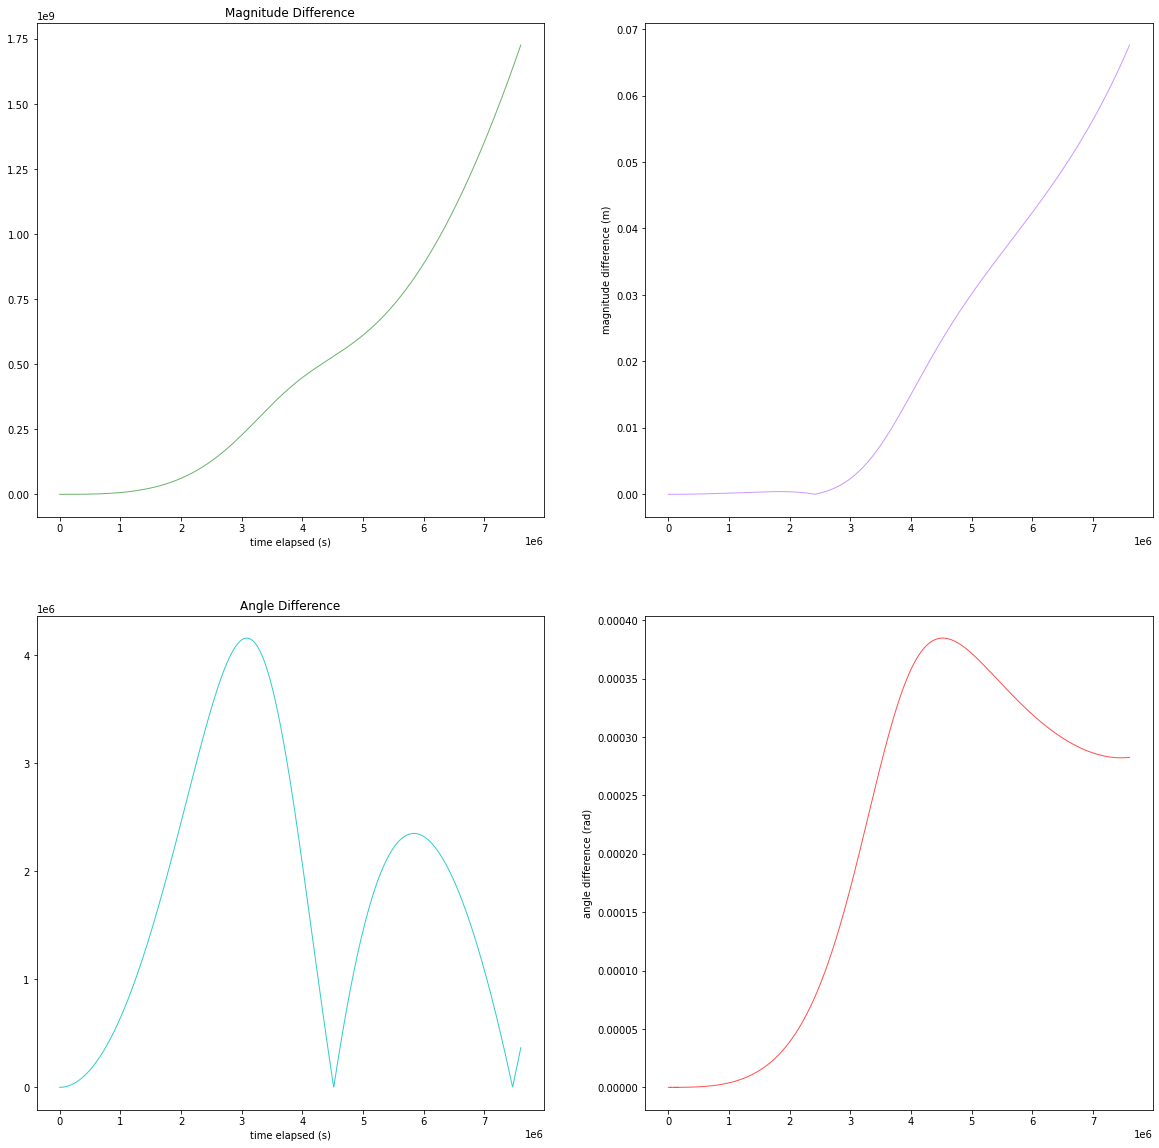

In [ ]:
# creates a figure with 2 subplots (for each component of accel)
fig, axs = plt.subplots(2, 2, figsize=(20,20))

#axs[0].set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
#axs[1].set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
#axs[0].set_yscale('log')
#axs[1].set_yscale('log')

axs[0,0].plot(index_list, RdiffStateVSEuler, linestyle='-', linewidth=1, c=color_list[0])
axs[1,0].plot(index_list, RdiffStateVSRK4, linestyle='-', linewidth=1, c=color_list[1])
axs[0,1].plot(index_list, thetadiffStateVSEuler, linestyle='-', linewidth=1, c=color_list[2])
axs[1,1].plot(index_list, thetadiffStateVSRK4, linestyle='-', linewidth=1, c=color_list[3])

# sets the labels for each subplot
axs[0,0].title.set_text('Magnitude Difference')
axs[1,0].title.set_text('Angle Difference')
#axs[0,1].set(xlim=(0,86400), ylim=(0,4))
#axs[1,1].set(xlim=(0,86400), ylim=(0,0.1))

axs[0,0].set_xlabel('time elapsed (s)')
axs[0,1].set_ylabel('magnitude difference (m)')
axs[1,0].set_xlabel('time elapsed (s)')
axs[1,1].set_ylabel('angle difference (rad)')

#plt.legend(handles=legend_list[0:3], bbox_to_anchor=(1, 2), loc=2, borderaxespad=0.)

plt.show()
#plt.savefig(f'{duration}errors.png')

for both euler and rk4

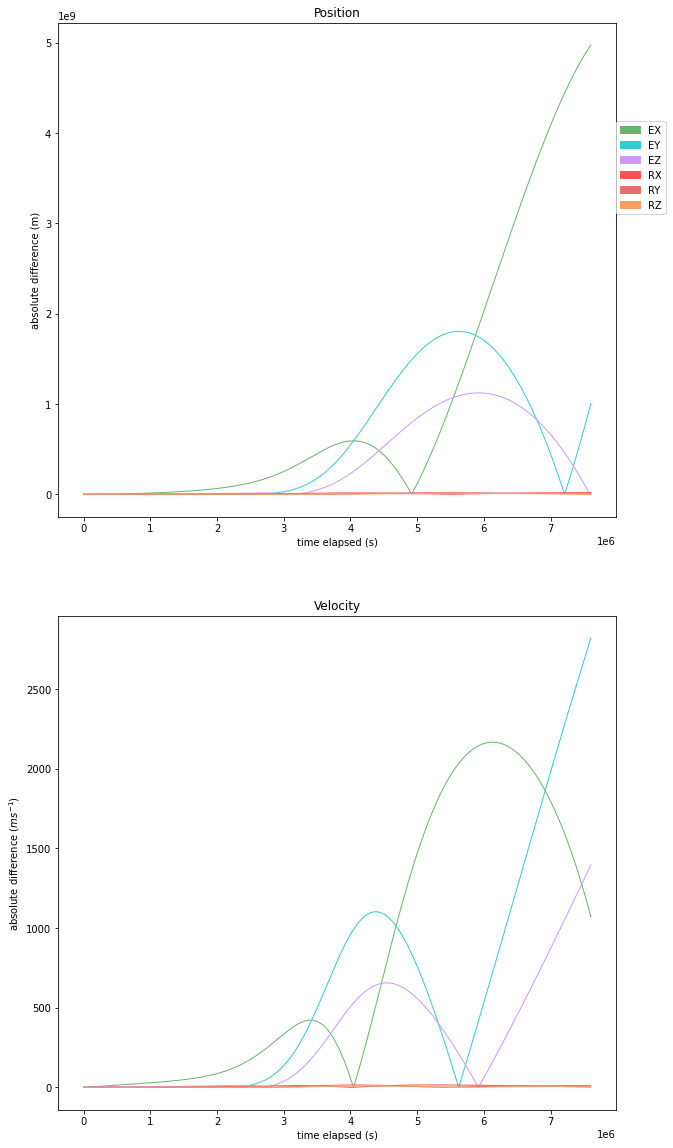

In [ ]:
# creates a figure with 2 subplots (for each component of accel)
fig, axs = plt.subplots(2, 1, figsize=(10,20))

#axs[0].set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
#axs[1].set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
#axs[0].set_yscale('log')
#axs[1].set_yscale('log')

for i in range(6):
  axs[0].plot(index_list, posPlot[i], linestyle='-', linewidth=1, c=color_list[i])
  axs[1].plot(index_list, velPlot[i], linestyle='-', linewidth=1, c=color_list[i])

# sets the labels for each subplot
axs[0].title.set_text('Position')
axs[1].title.set_text('Velocity')
#axs[0].set(xlim=(0,86400), ylim=(0,4))
#axs[1].set(xlim=(0,86400), ylim=(0,0.1))

axs[0].set_xlabel('time elapsed (s)')
axs[0].set_ylabel('absolute difference (m)')
axs[1].set_xlabel('time elapsed (s)')
axs[1].set_ylabel('absolute difference ($ms^{-1}$)')

plt.legend(handles=legend_list, bbox_to_anchor=(1, 2), loc=2, borderaxespad=0.)

plt.show()
#plt.savefig(f'{duration}errors.png')

for individual plots

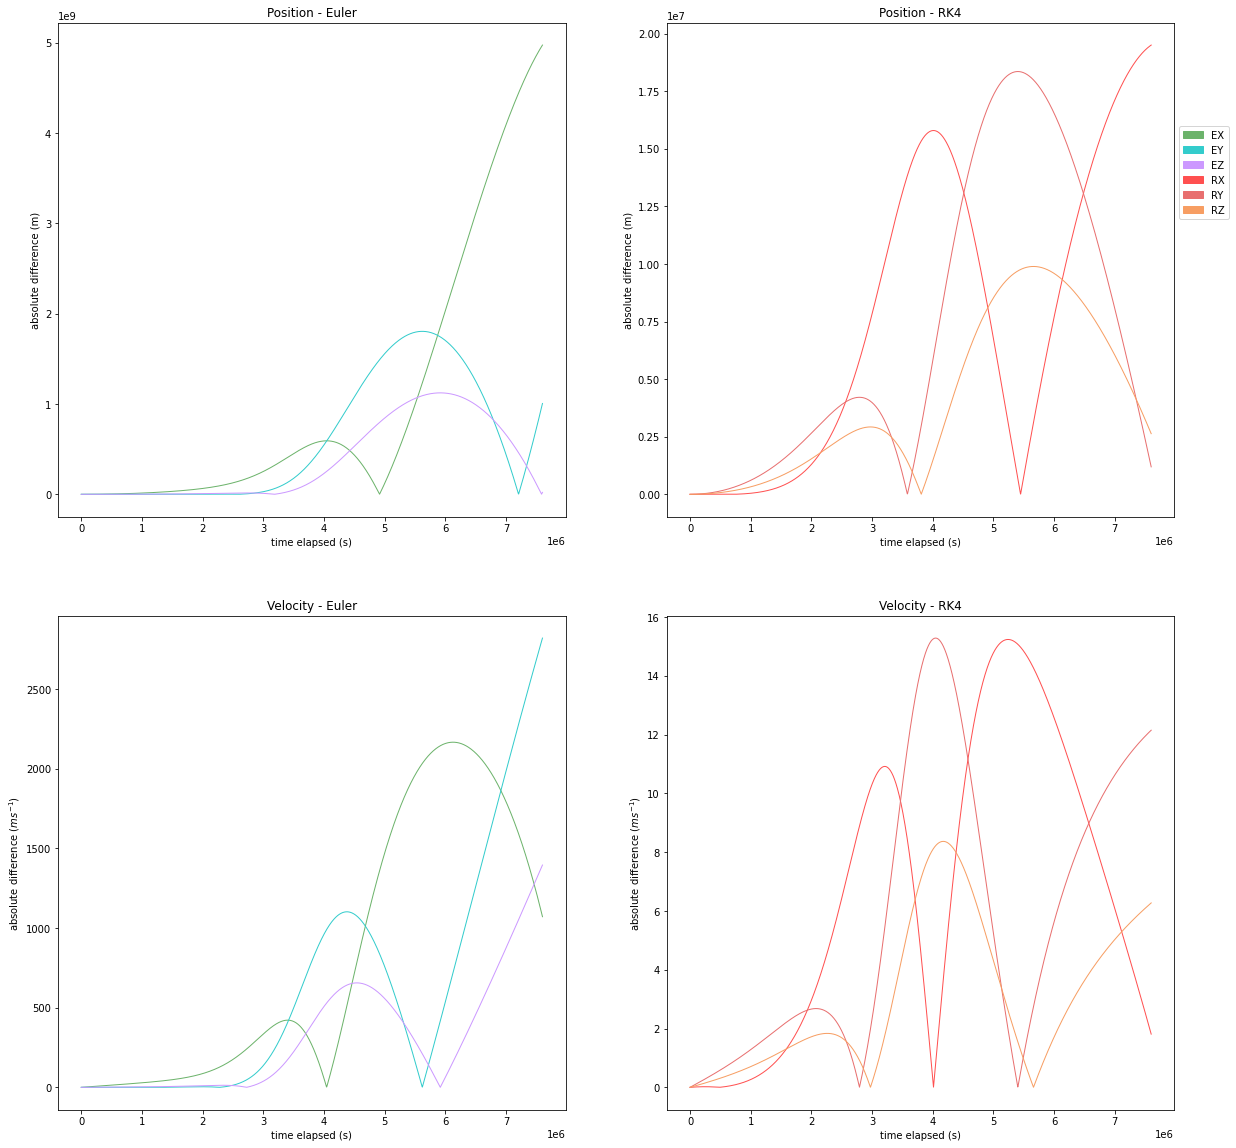

<Figure size 432x288 with 0 Axes>

In [ ]:
# creates a figure with 2 subplots (for each component of accel)
fig, axs = plt.subplots(2, 2, figsize=(20,20))

#axs[0].set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
#axs[1].set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
#axs[0].set_yscale('log')
#axs[1].set_yscale('log')

for i in range(3):
  axs[0,0].plot(index_list, posPlot[i], linestyle='-', linewidth=1, c=color_list[i])
  axs[1,0].plot(index_list, velPlot[i], linestyle='-', linewidth=1, c=color_list[i])
  j = i+3
  axs[0,1].plot(index_list, posPlot[j], linestyle='-', linewidth=1, c=color_list[j])
  axs[1,1].plot(index_list, velPlot[j], linestyle='-', linewidth=1, c=color_list[j])

# sets the labels for each subplot
axs[0,0].title.set_text('Position - Euler')
axs[1,0].title.set_text('Velocity - Euler')
axs[0,1].title.set_text('Position - RK4')
axs[1,1].title.set_text('Velocity - RK4')
#axs[0].set(xlim=(0,86400), ylim=(0,4))
#axs[1].set(xlim=(0,86400), ylim=(0,0.1))

axs[0,0].set_xlabel('time elapsed (s)')
axs[0,0].set_ylabel('absolute difference (m)')
axs[1,0].set_xlabel('time elapsed (s)')
axs[1,0].set_ylabel('absolute difference ($ms^{-1}$)')
axs[0,1].set_xlabel('time elapsed (s)')
axs[0,1].set_ylabel('absolute difference (m)')
axs[1,1].set_xlabel('time elapsed (s)')
axs[1,1].set_ylabel('absolute difference ($ms^{-1}$)')

plt.legend(handles=legend_list, bbox_to_anchor=(1, 2), loc=2, borderaxespad=0.5)

plt.show()
plt.savefig(f'{duration}individualerrors.png')

## RMWSE method

$$L_{RMSWE} = \sum \left(\frac{||O-A||}{||O||}\right)^2$$

where
- $O$ is the Ground Truth (Accelerations from Newtonian GN)
- $A$ is the Prediction (Accelerations from State or Accel GNN)

$||-||$ normalizes the vectors: 
- $||O-A|| = \sqrt{(a_1-o_1)^2+\dots + (a_n-o_n)^2}$
- $||O|| = \sqrt{a_1^2+\dots + a_n^2}$

### load data

In [ ]:
dt = 3600

In [ ]:
AE = pd.read_csv('/content/drive/MyDrive/mathIA/88daysEuler<3.csv')
AR= pd.read_csv('/content/drive/MyDrive/mathIA/88daysRK4<3.csv')
O = pd.read_csv('/content/drive/MyDrive/mathIA/88daysPLUTODATA<3.csv')

In [ ]:
O

,Unnamed: 0,X,Y,Z,VX,VY,VZ
0,0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204
1,1,-9.336185e+09,-6.136545e+10,-3.181319e+10,38500.354833,-2186.508355,-5158.889207
2,2,-9.197560e+09,-6.137317e+10,-3.183168e+10,38513.403251,-2100.096100,-5114.080980
3,3,-9.058889e+09,-6.138057e+10,-3.185001e+10,38526.258227,-2013.661197,-5069.240603
4,4,-8.920172e+09,-6.138767e+10,-3.186818e+10,38538.919681,-1927.203811,-5024.368155
...,...,...,...,...,...,...,...
2108,2108,-9.925138e+09,-6.132909e+10,-3.173274e+10,38442.753263,-2553.700477,-5349.041401
2109,2109,-9.786719e+09,-6.133813e+10,-3.175192e+10,38456.623575,-2467.386153,-5304.370645
2110,2110,-9.648251e+09,-6.134686e+10,-3.177093e+10,38470.300773,-2381.048486,-5259.667401
2111,2111,-9.509733e+09,-6.135528e+10,-3.178979e+10,38483.784782,-2294.687637,-5214.931749


In [ ]:
dataframe_list = [AE, AR, O]
time_index = [dt*x for x in O.index.tolist()]

for dataframe in dataframe_list:
  dataframe.drop(columns = dataframe.columns[0], axis = 1, inplace=True)
  dataframe.index = time_index

In [ ]:
AE

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
3600,-9.336185e+09,-6.136545e+10,-3.181319e+10,38500.452095,-2186.515759,-5158.903272,6.974928e+10,9.008011e+20,0.003652,0.024001,0.012443
7200,-9.197560e+09,-6.137317e+10,-3.183168e+10,38513.597805,-2100.110825,-5114.109070,6.974609e+10,9.008835e+20,0.003598,0.024008,0.012452
10800,-9.058887e+09,-6.138058e+10,-3.185001e+10,38526.550103,-2013.683160,-5069.282676,6.974283e+10,9.009679e+20,0.003544,0.024014,0.012461
14400,-8.920169e+09,-6.138767e+10,-3.186818e+10,38539.308910,-1927.232928,-5024.424170,6.973949e+10,9.010541e+20,0.003490,0.024020,0.012470
...,...,...,...,...,...,...,...,...,...,...,...
7588800,-1.488340e+10,-6.229441e+10,-3.173442e+10,37348.882538,-5355.085694,-6732.159851,7.147854e+10,8.577427e+20,0.005409,0.022639,0.011533
7592400,-1.474890e+10,-6.231354e+10,-3.175858e+10,37368.354459,-5273.586027,-6690.641768,7.147807e+10,8.577540e+20,0.005360,0.022646,0.011542
7596000,-1.461434e+10,-6.233238e+10,-3.178259e+10,37387.650807,-5192.059720,-6649.091254,7.147753e+10,8.577670e+20,0.005311,0.022654,0.011551
7599600,-1.447971e+10,-6.235092e+10,-3.180645e+10,37406.771540,-5110.506915,-6607.508382,7.147692e+10,8.577816e+20,0.005263,0.022661,0.011560


In [ ]:
AE = AE.drop(['AX','AY','AZ','F','r'], axis=1)
AR = AR.drop(['AX','AY','AZ','F','r'], axis=1)

In [ ]:
AE

,X,Y,Z,VX,VY,VZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204
3600,-9.336185e+09,-6.136545e+10,-3.181319e+10,38500.452095,-2186.515759,-5158.903272
7200,-9.197560e+09,-6.137317e+10,-3.183168e+10,38513.597805,-2100.110825,-5114.109070
10800,-9.058887e+09,-6.138058e+10,-3.185001e+10,38526.550103,-2013.683160,-5069.282676
14400,-8.920169e+09,-6.138767e+10,-3.186818e+10,38539.308910,-1927.232928,-5024.424170
...,...,...,...,...,...,...
7588800,-1.488340e+10,-6.229441e+10,-3.173442e+10,37348.882538,-5355.085694,-6732.159851
7592400,-1.474890e+10,-6.231354e+10,-3.175858e+10,37368.354459,-5273.586027,-6690.641768
7596000,-1.461434e+10,-6.233238e+10,-3.178259e+10,37387.650807,-5192.059720,-6649.091254
7599600,-1.447971e+10,-6.235092e+10,-3.180645e+10,37406.771540,-5110.506915,-6607.508382


In [ ]:
O_AE = abs(AE-O)
O_AR = abs(AR-O)

In [ ]:
O_AE

,X,Y,Z,VX,VY,VZ
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3600,1.170740e+02,6.459084e+00,1.563707e+01,0.097262,0.007404,0.014065
7200,5.843214e+02,3.947204e+01,8.185938e+01,0.194554,0.014725,0.028090
10800,1.401851e+03,9.873999e+01,1.985187e+02,0.291876,0.021963,0.042073
14400,2.569772e+03,1.839639e+02,3.654665e+02,0.389229,0.029118,0.056015
...,...,...,...,...,...,...
7588800,4.958258e+09,9.653140e+08,1.673834e+06,1093.870725,2801.385217,1383.118450
7592400,4.962186e+09,9.754076e+08,6.658725e+06,1088.269115,2806.199874,1386.271123
7596000,4.966093e+09,9.855186e+08,1.165497e+07,1082.649966,2811.011235,1389.423853
7599600,4.969981e+09,9.956469e+08,1.666256e+07,1077.013242,2815.819278,1392.576633


In [ ]:
R_values = pd.DataFrame()

In [ ]:
R_values.index = O.index

In [ ]:
R_values['POR'] = (O['X']**2+O['Y']**2+O['Z']**2)**(1/2)
R_values['PAER'] = (O_AE['X']**2+O_AE['Y']**2+O_AE['Z']**2)**(1/2)
R_values['PARR'] = (O_AR['X']**2+O_AR['Y']**2+O_AR['Z']**2)**(1/2)

In [ ]:
R_values['VOR'] = (O['VX']**2+O['VY']**2+O['VZ']**2)**(1/2)
R_values['VAER'] = (O_AE['VX']**2+O_AE['VY']**2+O_AE['VZ']**2)**(1/2)
R_values['VARR'] = (O_AR['VX']**2+O_AR['VY']**2+O_AR['VZ']**2)**(1/2)

In [ ]:
SWE = pd.DataFrame()

In [ ]:
SWE.index = R_values.index

In [ ]:
SWE['EulerPos'] = (R_values['PAER']/R_values['POR'])**2
SWE['RK4Pos'] = (R_values['PARR']/R_values['POR'])**2
SWE['EulerVel'] = (R_values['VAER']/R_values['VOR'])**2
SWE['RK4Vel'] = (R_values['VARR']/R_values['VOR'])**2

In [ ]:
R_values

,POR,PAER,PARR,VOR,VAER,VARR
0,6.975240e+10,0.000000e+00,0.000000e+00,38903.753894,0.000000,0.000000
3600,6.974928e+10,1.182902e+02,8.274558e+00,38905.941435,0.098552,0.004597
7200,6.974609e+10,5.913464e+02,3.309965e+01,38908.179832,0.197122,0.009195
10800,6.974283e+10,1.419276e+03,7.447758e+01,38910.469088,0.295710,0.013793
14400,6.973949e+10,2.602140e+03,1.324108e+02,38912.809203,0.394315,0.018392
...,...,...,...,...,...,...
7588800,6.976197e+10,5.051352e+09,1.970834e+07,38897.029559,3310.185636,13.767393
7592400,6.975909e+10,5.057148e+09,1.970904e+07,38899.051905,3313.734302,13.772946
7596000,6.975613e+10,5.062950e+09,1.970976e+07,38901.125107,3317.290122,13.778530
7599600,6.975310e+10,5.068757e+09,1.971051e+07,38903.249166,3320.853114,13.784143


In [ ]:
SWE.to_csv(f'/content/drive/MyDrive/mathIA/88daysSWE<3.csv')

# simulation/visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from functools import partial

assign data

In [ ]:
EP, RP, EV, RV = list(SWE['EulerPos']), list(SWE['RK4Pos']), list(SWE['EulerVel']), list(SWE['RK4Vel'])

In [ ]:
label_list = ['EP', 'RP', 'EV', 'RV']
color_list = ['#6CB36B','#33CCCC', '#CC99FF', '#FF5050', '#E86F6F', '#F79E63']
legend_list =  [mpatches.Patch(color=color_list[i], label=f'{label_list[i]}') for i in range(4)]
index_list = SWE.index.to_list()

plot

AttributeError: ignored

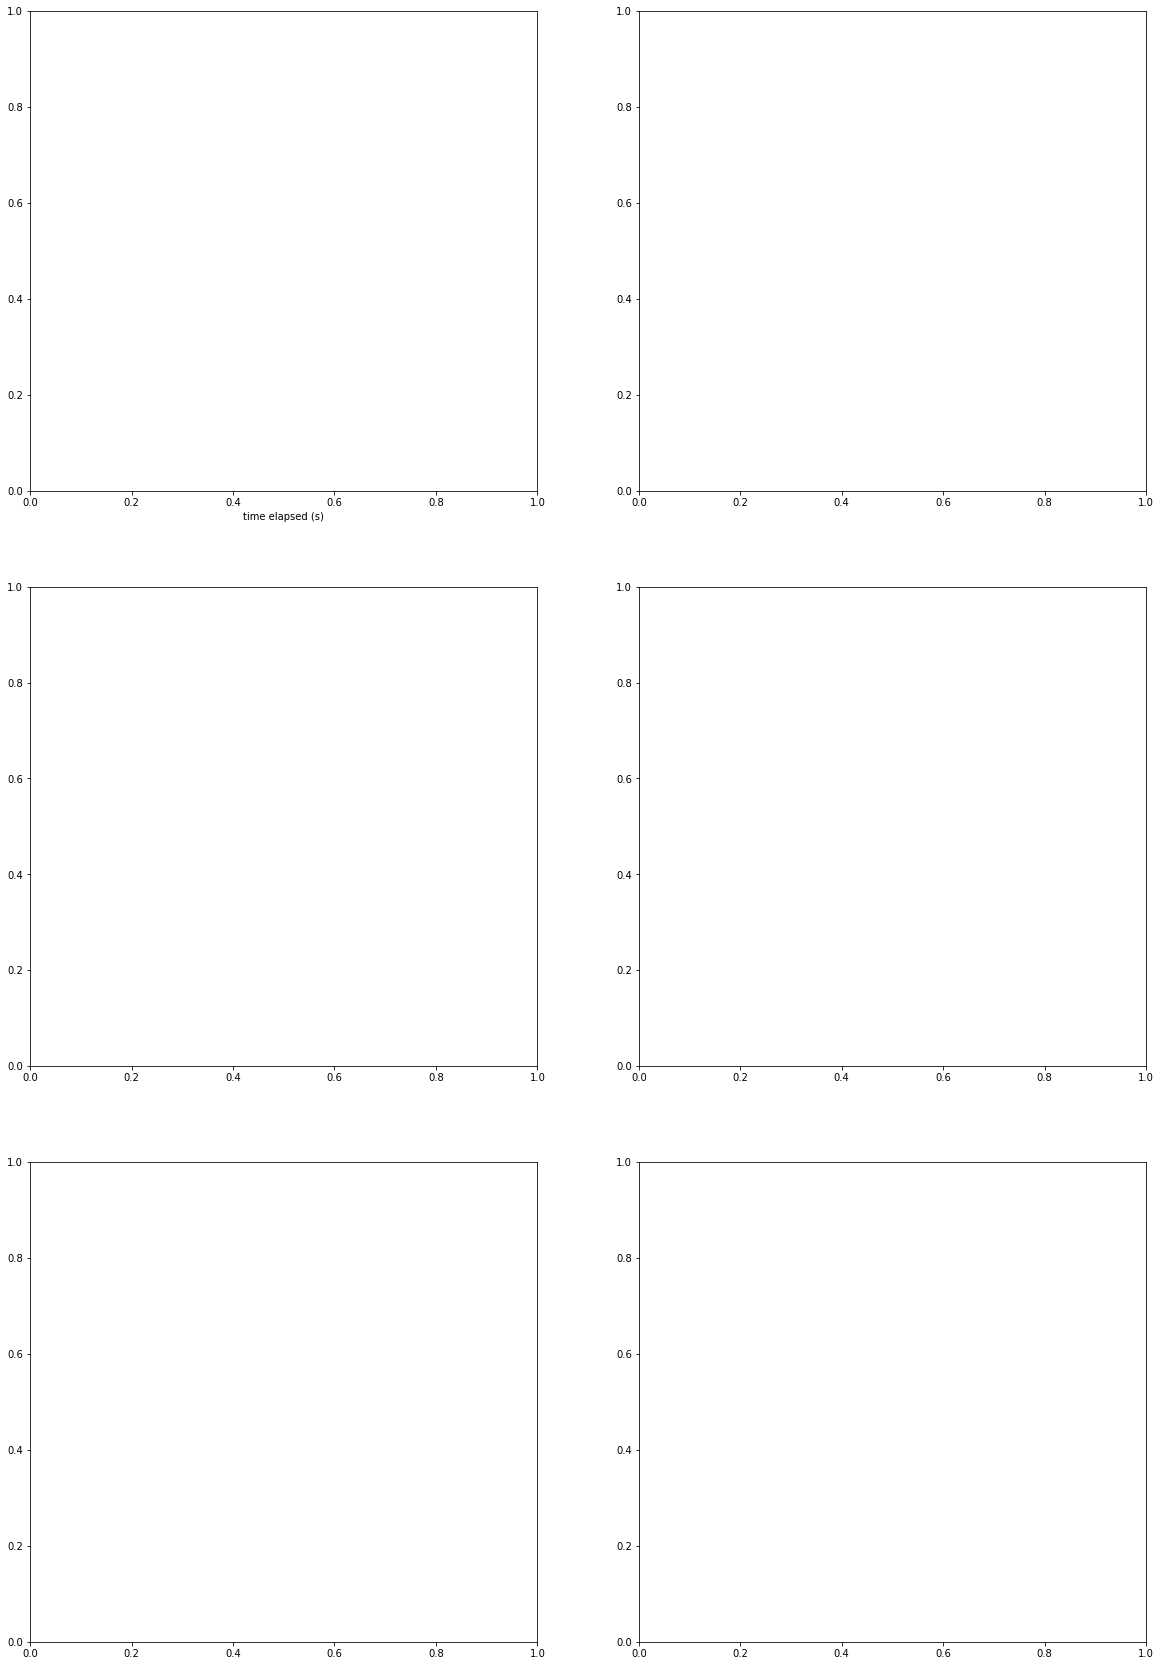

In [ ]:
# creates a figure with 2 subplots (for each component of accel)
fig, axs = plt.subplots(3, 2, figsize=(20,30))

axs = np.array(axs)

for ax in axs.reshape(-1):
  ax.set_xlabel('time elapsed (s)')

axs[0,0].plot(index_list, EP, linestyle='-', linewidth=1, c=color_list[0])
axs[1,0].plot(index_list, RP, linestyle='-', linewidth=1, c=color_list[1])
axs[2,0].plot(index_list, EP, linestyle='-', linewidth=1, c=color_list[0])
axs[2,0].plot(index_list, RP, linestyle='-', linewidth=1, c=color_list[1])

axs[0,1].plot(index_list, EV, linestyle='-', linewidth=1, c=color_list[2])
axs[1,1].plot(index_list, RV, linestyle='-', linewidth=1, c=color_list[3])
axs[2,1].plot(index_list, EV, linestyle='-', linewidth=1, c=color_list[2])
axs[2,1].plot(index_list, RV, linestyle='-', linewidth=1, c=color_list[3])

# sets the labels for each subplot
axs[0,0].title.set_text('Position - Euler')
axs[1,0].title.set_text('Position - RK4')
axs[2,0].title.set_text('Position - Combined')
axs[0,1].title.set_text('Velocity - Euler')
axs[1,1].title.set_text('Velocity - RK4')
axs[2,1].title.set_text('Velocity - Combined')
#axs[0].set(xlim=(0,86400), ylim=(0,4))
#axs[1].set(xlim=(0,86400), ylim=(0,0.1))

axs[0,0].set_ylabel('absolute difference (m)')
axs[1,0].set_ylabel('absolute difference (m)')
axs[2,0].set_ylabel('absolute difference (m)')
axs[0,1].set_ylabel('absolute difference ($ms^{-1}$)')
axs[1,1].set_ylabel('absolute difference ($ms^{-1}$)')
axs[2,1].set_ylabel('absolute difference ($ms^{-1}$)')

plt.legend(handles=legend_list, bbox_to_anchor=(1, 2), loc=2, borderaxespad=0.5)

plt.show()
#plt.savefig('88daysSWE')

In [ ]:
k = 100
index_list2 = index_list[0:k]

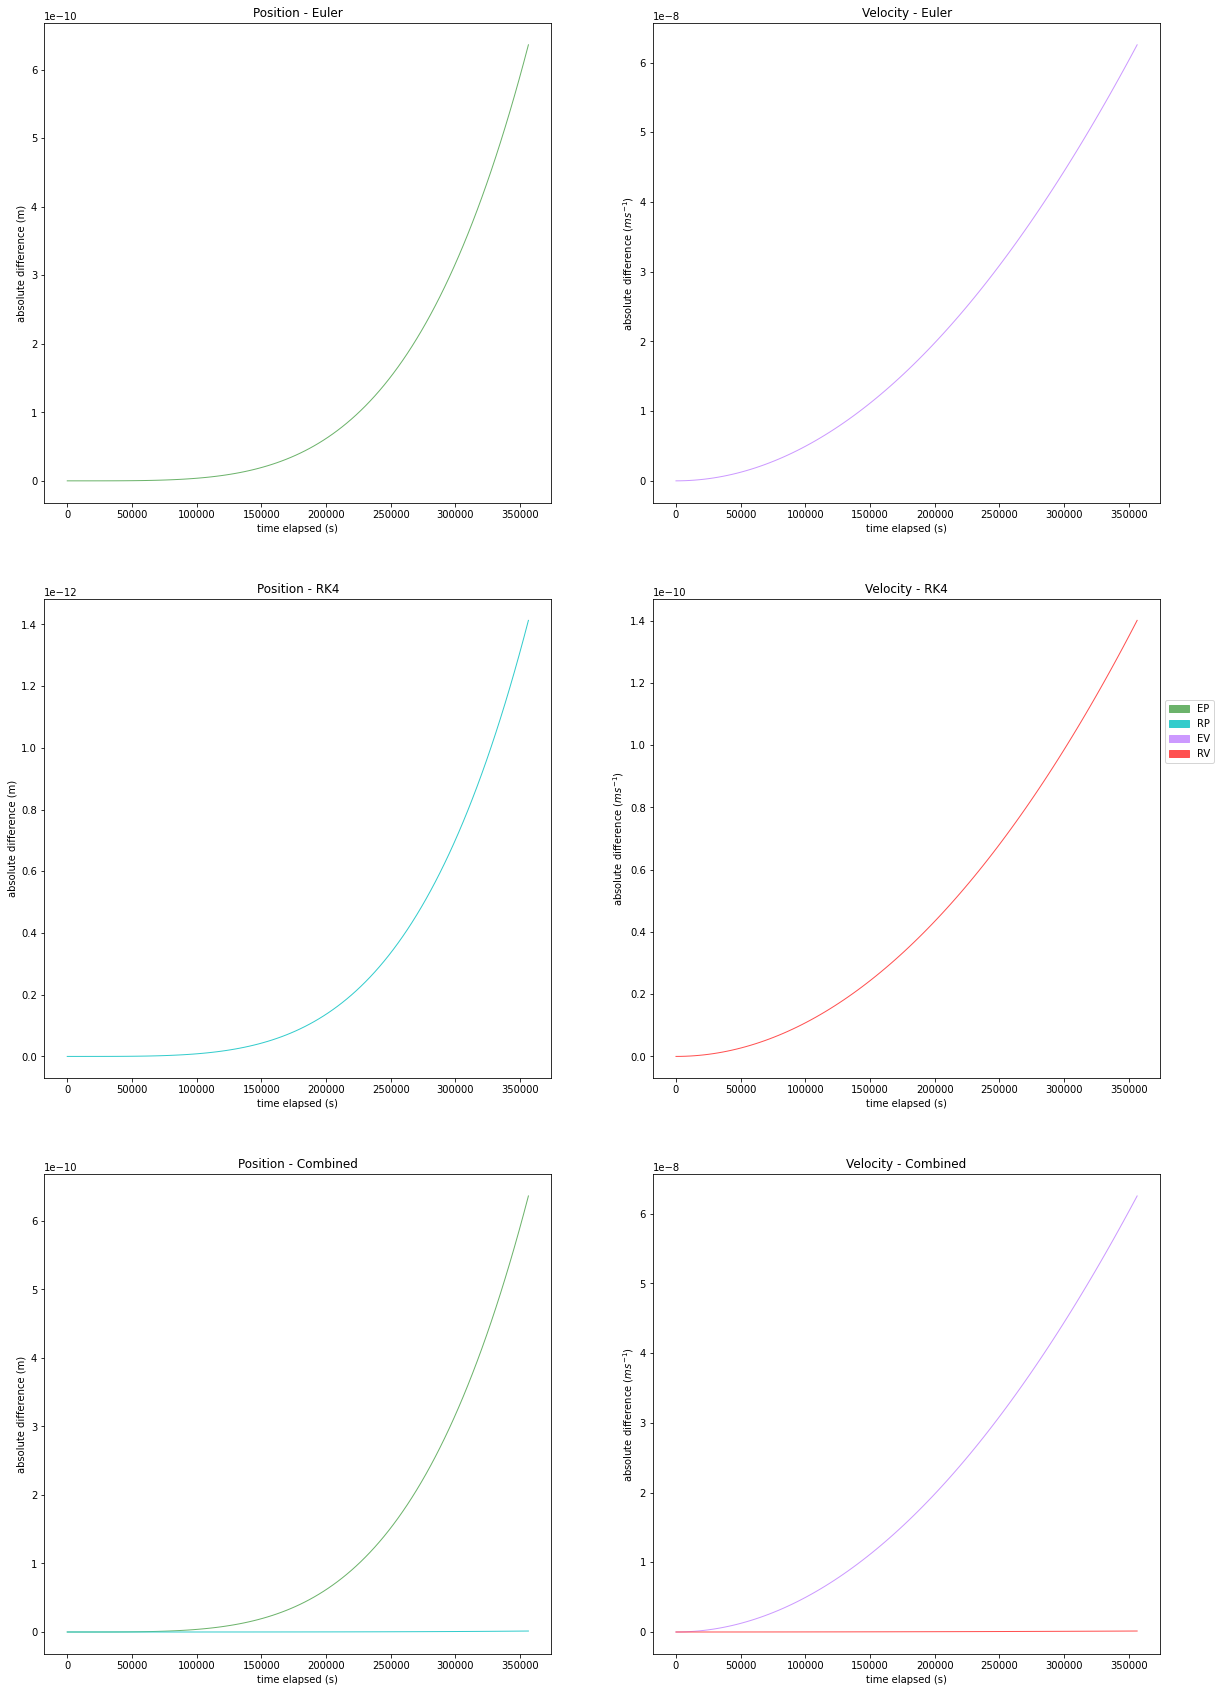

<Figure size 432x288 with 0 Axes>

In [ ]:
# creates a figure with 2 subplots (for each component of accel)
fig, axs = plt.subplots(3, 2, figsize=(20,30))

axs = np.array(axs)

for ax in axs.reshape(-1):
  ax.set_xlabel('time elapsed (s)')

axs[0,0].plot(index_list2, EP[0:k], linestyle='-', linewidth=1, c=color_list[0])
axs[1,0].plot(index_list2, RP[0:k], linestyle='-', linewidth=1, c=color_list[1])
axs[2,0].plot(index_list2, EP[0:k], linestyle='-', linewidth=1, c=color_list[0])
axs[2,0].plot(index_list2, RP[0:k], linestyle='-', linewidth=1, c=color_list[1])

axs[0,1].plot(index_list2, EV[0:k], linestyle='-', linewidth=1, c=color_list[2])
axs[1,1].plot(index_list2, RV[0:k], linestyle='-', linewidth=1, c=color_list[3])
axs[2,1].plot(index_list2, EV[0:k], linestyle='-', linewidth=1, c=color_list[2])
axs[2,1].plot(index_list2, RV[0:k], linestyle='-', linewidth=1, c=color_list[3])

# sets the labels for each subplot
axs[0,0].title.set_text('Position - Euler')
axs[1,0].title.set_text('Position - RK4')
axs[2,0].title.set_text('Position - Combined')
axs[0,1].title.set_text('Velocity - Euler')
axs[1,1].title.set_text('Velocity - RK4')
axs[2,1].title.set_text('Velocity - Combined')
#axs[0].set(xlim=(0,86400), ylim=(0,4))
#axs[1].set(xlim=(0,86400), ylim=(0,0.1))

axs[0,0].set_ylabel('absolute difference (m)')
axs[1,0].set_ylabel('absolute difference (m)')
axs[2,0].set_ylabel('absolute difference (m)')
axs[0,1].set_ylabel('absolute difference ($ms^{-1}$)')
axs[1,1].set_ylabel('absolute difference ($ms^{-1}$)')
axs[2,1].set_ylabel('absolute difference ($ms^{-1}$)')

plt.legend(handles=legend_list, bbox_to_anchor=(1, 2), loc=2, borderaxespad=0.5)

plt.show()
plt.savefig('88daysSWE')

In [ ]:
axs[0,0].set_ylabel('absolute difference (m)')

axs[0,0].set_xlabel('time elapsed (s)')
axs[0,0].set_ylabel('absolute difference (m)')
axs[1,0].set_xlabel('time elapsed (s)')
axs[1,0].set_ylabel('absolute difference ($ms^{-1}$)')
axs[0,1].set_xlabel('time elapsed (s)')
axs[0,1].set_ylabel('absolute difference (m)')
axs[1,1].set_xlabel('time elapsed (s)')
axs[1,1].set_ylabel('absolute difference ($ms^{-1}$)')

https://plotly.com/python/3d-line-plots/

https://plotly.com/python/3d-scatter-plots/

https://plotly.com/python/interactive-html-export/?_gl=1*62cflj*_ga*MTI4NjY5MDUwNS4xNjY5MDk1MDE1*_ga_6G7EE0JNSC*MTY2OTEwNTMyNy4zLjEuMTY2OTEwNTMyOS4wLjAuMA.. 

In [ ]:
import plotly.express as px

In [ ]:
AE3D = AE.copy()
AR3D = AR.copy()
O3D = O.copy()

In [ ]:
AE3D['colour'] = 'Euler'
AR3D['colour'] = 'RK4'
O3D['colour'] = 'Actual'

In [ ]:
yasss = [AE3D, AR3D, O3D]

In [ ]:
df = pd.concat(yasss) #ignore_index=True)

In [ ]:
df

,X,Y,Z,VX,VY,VZ,colour
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204,Euler
3600,-9.336185e+09,-6.136545e+10,-3.181319e+10,38500.452095,-2186.515759,-5158.903272,Euler
7200,-9.197560e+09,-6.137317e+10,-3.183168e+10,38513.597805,-2100.110825,-5114.109070,Euler
10800,-9.058887e+09,-6.138058e+10,-3.185001e+10,38526.550103,-2013.683160,-5069.282676,Euler
14400,-8.920169e+09,-6.138767e+10,-3.186818e+10,38539.308910,-1927.232928,-5024.424170,Euler
...,...,...,...,...,...,...,...
7588800,-9.925138e+09,-6.132909e+10,-3.173274e+10,38442.753263,-2553.700477,-5349.041401,Actual
7592400,-9.786719e+09,-6.133813e+10,-3.175192e+10,38456.623575,-2467.386153,-5304.370645,Actual
7596000,-9.648251e+09,-6.134686e+10,-3.177093e+10,38470.300773,-2381.048486,-5259.667401,Actual
7599600,-9.509733e+09,-6.135528e+10,-3.178979e+10,38483.784782,-2294.687637,-5214.931749,Actual


In [ ]:
df

,X,Y,Z,colour
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,#6CB36B
3600,-9.336185e+09,-6.136545e+10,-3.181319e+10,#6CB36B
7200,-9.197560e+09,-6.137317e+10,-3.183168e+10,#6CB36B
10800,-9.058889e+09,-6.138057e+10,-3.185001e+10,#6CB36B
14400,-8.920172e+09,-6.138767e+10,-3.186818e+10,#6CB36B
...,...,...,...,...
7588800,-9.925138e+09,-6.132909e+10,-3.173274e+10,#6CB36B
7592400,-9.786719e+09,-6.133813e+10,-3.175192e+10,#6CB36B
7596000,-9.648251e+09,-6.134686e+10,-3.177093e+10,#6CB36B
7599600,-9.509733e+09,-6.135528e+10,-3.178979e+10,#6CB36B


In [ ]:
fig = px.scatter_3d(df, x='X', y='Y', z='Z',
              color='colour')#, size_max=0.1)
fig.update_traces(marker_size = 2)
fig.show()

fig.write_html('/content/drive/MyDrive/mathIA/88daysPLUTOscatter3D.html')

In [ ]:
fig = px.line_3d(df, x='X', y='Y', z='Z',
              color='colour')
fig.update_traces(marker_size = 1)
fig.show()

fig.write_html('/content/drive/MyDrive/mathIA/88daysPLUTOline3D.html')

# extra

## Computing Acceleration

$$\def\Adel{
\begin{pmatrix}
    \frac{\partial F}{\partial x} (x,y,z) \\
    \frac{\partial F}{\partial y} (x,y,z)\\
    \frac{\partial F}{\partial z} (x,y,z)
\end{pmatrix}}$$

$$\vec{a}(x,y,z) = \frac{1}{M_P} \nabla F(x,y,z) = \frac{1}{M_P} \Adel$$

$$g = -\frac{GM}{r^2}x$$

## partial derivatives

$$\frac{\partial F}{\partial x}(x,y,z)=\frac{-2x G M_S M_E}{(x^2+y^2+z^2)^2}=-2xF\frac{1}{r^2}$$

In [ ]:
#smth is wrong
def A(s,M):
  def p_dev(x):
    p_x = x*(-2*s[7])*(1/(s[6]**2))
    return p_x
  #accel = np.array([p_dev(s.X), p_dev(s.Y), p_dev(s.Z)])
  #accel = accel.tolist()
  #state.loc[t-1,'a'] = accel
  #state.loc[t-1,'AX'] = p_dev(s[0])
  #state.loc[t-1,'AY'] = p_dev(s[1])
  #state.loc[t-1,'AZ'] = p_dev(s[2])

  #p[0]**2 + p[1]**2 + p[2]**2
  #p['r'] = pd.sum(p['X']**2,p['Y']**2,p['Z']**2)
  #pos['r'] = np.square(pos['X']) + np.square(pos['Y']) + np.square(pos['Z'])
  def divide_M(x):
    return x/M
  
  return p_dev(s[0]), p_dev(s[1]), p_dev(s[2]), divide_M(p_dev(s[0])), divide_M(p_dev(s[1])), divide_M(p_dev(s[2]))

In [ ]:
C_state_1 = pos.copy()
s = C_state_1.loc[t-1,:]
px, py, pz, C_state_1.loc[t-1,'AX'], C_state_1.loc[t-1,'AY'], C_state_1.loc[t-1,'AZ'] = A(s,M_p)

In [ ]:
print(px, py, pz)
p =(px**2 + py**2 + pz**2)**(1/2)
print(p)


2322553100672320.0 -1771949951630569.0 -1252545803087908.5
3178510740167369.0


In [ ]:
C_state_1

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-3.970399e+12,3.029144e+12,2.141224e+12,-2222.016864,-4563.247466,-751.446826,5.433656e+12,8.635468e+27,1.777011e-07,-1.355738e-07,-9.583365e-08


In [ ]:
#A(C_state,M_p,1)

### concat method

In [ ]:
print(Gf(Euler_L.loc[t-1,:]))

(69752402327.92009, 9.007205029088648e+20)


In [ ]:
s = Euler_L.loc[t,:]
Euler_L.loc[t,'r'], Euler_L.loc[t,'F']=Gf(s)

In [ ]:
Euler_L

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
1,-9.474724e+09,-6.135743e+10,-3.179454e+10,38487.116758,-2272.873803,-5203.652770,6.975240e+10,9.007205e+20,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
s1 = Euler_L.loc[t,:]
Euler_L.loc[t,'AX'], Euler_L.loc[t,'AY'], Euler_L.loc[t,'AZ'] = GAccelNorm(s1,M_p)

0.027278029225661193
0.0037052746214637318 0.023995012689686436 0.012433872463450386


In [ ]:
Euler_L

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-9.474763e+09,-6.135743e+10,-3.179454e+10,38487.113053,-2272.897798,-5203.665204,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
1,-9.474724e+09,-6.135743e+10,-3.179454e+10,38487.116758,-2272.873803,-5203.652770,6.975240e+10,9.007205e+20,0.003705,0.023995,0.012434
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#iterative

h = 86400
t = 1

while t <= 1:
  Euler_L.loc[t,'X'], Euler_L.loc[t,'Y'], Euler_L.loc[t,'Z'], Euler_L.loc[t,'VX'], Euler_L.loc[t,'VY'], Euler_L.loc[t,'VZ'] = new_pos_vel(Euler_L,t,h)

  s = Euler_L.loc[t,:]
  Euler_L.loc[t,'r'], Euler_L.loc[t,'F']=Gf(s)

  s1 = Euler_L.loc[t,:]
  Euler_L.loc[t,'AX'], Euler_L.loc[t,'AY'], Euler_L.loc[t,'AZ'] = GAccelNorm(s1,M_p)
  t+=1

1798008410113164.5 -1371758591996236.5 -969660619862869.4 41712474651.7199 -31823785624.44832 -22495412300.692486
3.2217732621238797
-2.3541648818377707 1.7960682972742688 1.2695941608184904


In [ ]:
Euler_L

,X,Y,Z,VX,VY,VZ,r,F,AX,AY,AZ
0,-3.970399e+12,3.029144e+12,2.141224e+12,-2.222017e+03,-4.563247e+03,-7.514468e+02,5.433656e+12,8.635468e+27,482783.297150,-368330.799319,-260363.559598
1,1.798008e+15,-1.371759e+15,-9.696606e+14,4.171247e+10,-3.182379e+10,-2.249541e+10,2.460650e+15,4.210858e+22,-2.354165,1.796068,1.269594
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
